In [16]:
import pandas as pd
import numpy as np
import os
import imblearn
import matplotlib.pyplot as plt

# keep matplotlib interactive
%matplotlib notebook
# %matplotlib inline
# use ggplot style
plt.style.use('ggplot')

# Preface
Prior to building a model, we first need to make sure categorical data are encoded then we need to split our data into a train and test set. Because of class imbalance we will need to use upsampling (SMOTE or ADASYN) or downsampling.


In [2]:
# activity data
act_pickle = ['song_length_full.p34', 'song_total_full.p34', 'song_unique_full.p34']

In [3]:
# import our activity features
activity_list = []

for act in act_pickle:
    proc_dir = os.path.join(os.pardir, 'data', 'processed', act)
    df_proc = pd.read_pickle(proc_dir)
    
    # remove data from February 2017 (last month)
    last_month = df_proc.columns.get_level_values(level = 1).unique()[-1]
    df_proc = df_proc.drop(labels=last_month, axis = 1, level = 1)
    
    # collect activity dataframe
    activity_list.append(df_proc)

In [4]:
# import our transaction features
trans_proc_dir = os.path.join(os.pardir, 'data', 'processed', 'transactions_February2017.p34')
df_trans = pd.read_pickle(trans_proc_dir)

# convert payment id to category for subsequent encoding
df_trans.pay_id = df_trans.pay_id.astype('category')

# one-hot encoding scheme
df_trans = pd.get_dummies(df_trans, drop_first=True)
activity_list.append(df_trans)

In [5]:
# add target values
# eligible users are provided in a csv file
train_dir = os.path.join(os.pardir, 'data', 'raw', 'train.csv')
s_users = pd.read_csv(train_dir, index_col='msno', dtype = {'is_churn' : np.bool})
activity_list.append(s_users)

In [6]:
df_full = pd.concat(activity_list, axis = 1)

In [7]:
df_full = df_full.fillna(value=0)

In [8]:
df_full.head()

,"(num_25, 2016-09-30 00:00:00)","(num_25, 2016-10-31 00:00:00)","(num_25, 2016-11-30 00:00:00)","(num_25, 2016-12-31 00:00:00)","(num_25, 2017-01-31 00:00:00)","(num_50, 2016-09-30 00:00:00)","(num_50, 2016-10-31 00:00:00)","(num_50, 2016-11-30 00:00:00)","(num_50, 2016-12-31 00:00:00)","(num_50, 2017-01-31 00:00:00)",...,pay_id_33,pay_id_34,pay_id_35,pay_id_36,pay_id_37,pay_id_38,pay_id_39,pay_id_40,pay_id_41,is_churn
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.000000,0.000000,4.266667,6.225806,4.354839,0.000000,0.000000,2.366667,2.838710,2.225806,...,0,0,0,0,0,0,0,0,1,False
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.766667,1.032258,1.966667,1.387097,3.483871,0.933333,0.387097,0.766667,0.806452,1.161290,...,0,0,0,0,0,0,1,0,0,False
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,5.466667,6.096774,3.666667,5.354839,9.322581,1.966667,2.709677,1.400000,2.354839,5.645161,...,0,0,0,0,0,0,0,0,1,False
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,False
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,False


# Train-Test split

In [9]:
from sklearn.model_selection import train_test_split

# get target values
y = df_full.is_churn.values
X = df_full.drop(labels='is_churn', axis = 1).values

# keep test set
X_train, X_test, y_train, y_test = \
            train_test_split( X , y, test_size = 0.2, random_state = 7, stratify = y)

In [11]:
print(X_train.shape)
print(X_test.shape)

(794344, 97)
(198587, 97)


# Logistic regression with regularization

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


log_clf = Pipeline([('scaler', StandardScaler()),
                    ('imb', SMOTE(random_state=7)),
                    ('clf', LogisticRegression()),
                     ])
# 'minority'
parameters = {'imb__ratio': ['all'],
              'imb__k_neighbors': [5],
              'imb__m_neighbors': [10],
              'clf__penalty': ['l1'],
              'clf__C': [1],
             }

# set up grid search using all of my cores
gs_clf = GridSearchCV(log_clf, param_grid = parameters, cv = 5 , n_jobs=-1, verbose = 1)

# perform grid search CV on pipeline
_ = gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.0min remaining: 13.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.4min finished


In [13]:
from sklearn.metrics import classification_report
# training set score
print('Train score = ', gs_clf.score(X_train, y_train))
# test set score
print('Test score = ', gs_clf.score(X_test, y_test))

y_pred = gs_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Train score =  0.8566326427844864
Test score =  0.856380327010328
             precision    recall  f1-score   support

      False       0.98      0.87      0.92    185893
       True       0.27      0.72      0.39     12694

avg / total       0.93      0.86      0.88    198587



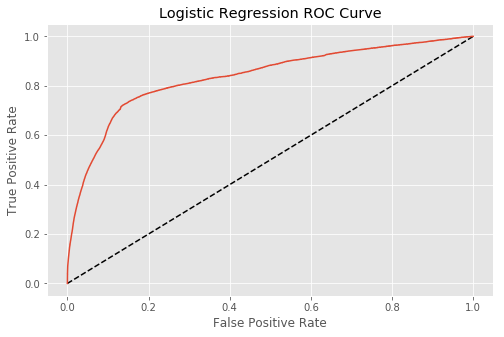

In [14]:
from sklearn.metrics import roc_curve

y_pred_prob = gs_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

figimp , axroc = plt.subplots(figsize = (8, 5))
axroc.plot([0, 1], [0, 1], 'k--')
axroc.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')

<IPython.core.display.Javascript object>


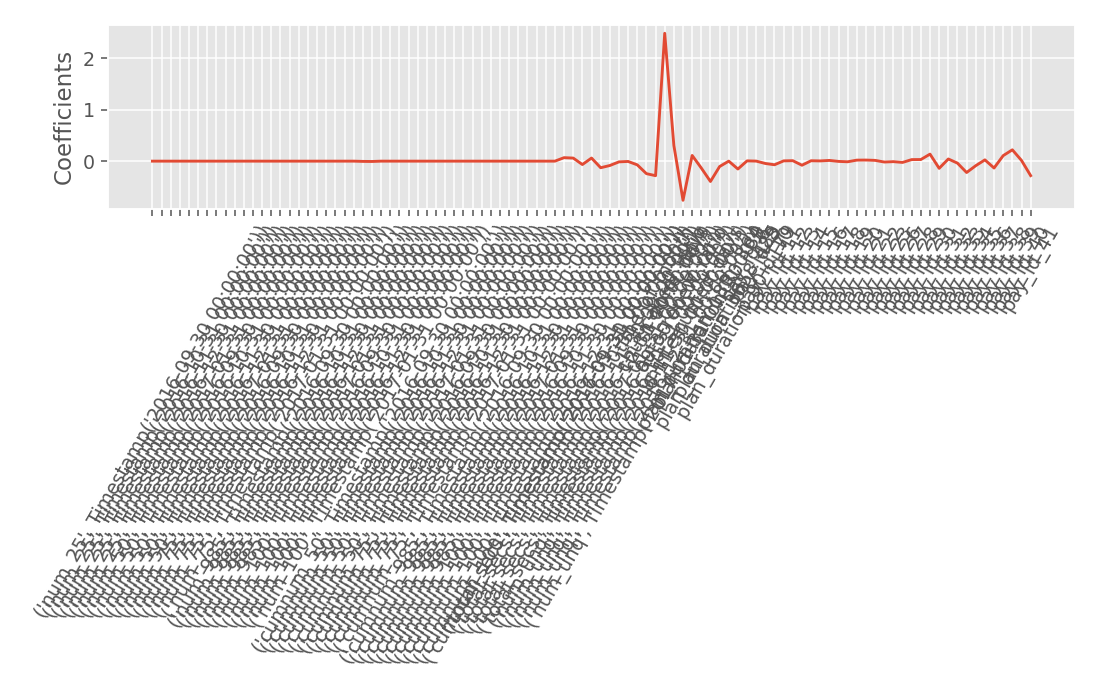

Most important feature = churn_zone_days


In [17]:
# get column names except target
names = df_full.drop(labels='is_churn', axis = 1).columns
# get coefficient of logistic regression model
l1_coef = gs_clf.best_estimator_.named_steps['clf'].coef_

# make plot
figimp , aximp = plt.subplots(figsize = (8, 5))
_ = aximp.plot(range(len(names)), l1_coef.reshape(-1,1))
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.tight_layout()

print('Most important feature =', names[l1_coef.argmax()])